In [41]:
# Loading data and data preprocessing 
import pandas as pd
import os
import glob
import ipywidgets as widgets
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.figure_factory as ff
import plotly.offline as offline
import numpy as np
import seaborn as sns
# matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# For Normalizing data
from sklearn.preprocessing import StandardScaler

# For statistical test
import scipy.stats as stats

# Split data set into training and test set
from sklearn.model_selection import train_test_split as tts

# SVN module
from sklearn import svm

# Kernel Functions used 
from sklearn.metrics.pairwise import rbf_kernel,laplacian_kernel

# module for chi square test
from scipy.stats import chisquare


# For dictionary 
from collections import defaultdict

In [42]:
#all_files = glob.glob(path + "/*.csv")
# Get the directory or foldr where our data set is stored
path = os.getcwd() + '/PEEK4' # get the full path /directory plus the PEEK4 dir.  
all_files =  glob.glob(os.path.join(path, "*.txt")) # store all .txt files in the path. 
                                                    #The path is as defined above


In [43]:
os.getcwd() # illustration of output of os.getcwd() # this is parent folder 
            # in the "path" defined above we added the PEEK4 folder because that is where the files are

'/home/cat/Desktop/dtc-tensorflow-master'

In [44]:
all_files[0] # all_files is a list containing the path to each text file

'/home/cat/Desktop/dtc-tensorflow-master/PEEK4/PEEK420180924-110550-002_1_237568_238591.txt'

In [45]:
# #### this one line of code reads all the text files stored in 
# all_files is a list of path to the text files
# for each text file path in the list , we read the content of the text file and  
# skip rows 0 to 11 which contain just information about the text file itself and not the signal information
peek_data = pd.concat((pd.read_csv(f,skiprows=range(0, 11),header=None) for f in all_files),axis = 1)

### desuggging the data set check if there is row with abnormal length
count = 0
for i in all_files:
    
    k = pd.read_csv(i,skiprows=range(0, 11),header=None)
    
    if k[0][0]== 0.:
        print(i)
    else :
        pass
    count +=1

In [46]:
# with the command below we view the first 5 rows of the data
peek_data.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.008667,0.001282,0.000580,-0.000061,-0.000702,-0.003296,0.000824,0.004578,-0.001160,0.000549,...,-0.004028,0.000488,-0.000519,0.000061,-0.001129,0.000732,0.001068,-0.001587,0.006623,0.000122
1,0.010193,0.000122,0.001526,0.000366,0.003204,-0.006561,0.000427,0.004273,0.000000,-0.001068,...,-0.008698,-0.005982,0.000092,-0.000458,0.009796,-0.001862,-0.000885,0.003388,0.002991,-0.000336
2,0.000580,-0.000671,0.000061,-0.000824,0.003265,-0.002747,0.000214,-0.003021,0.000763,-0.001923,...,0.010834,-0.003510,0.000519,-0.000183,0.013855,0.005310,-0.001190,0.002899,-0.000793,-0.000366
3,-0.005341,-0.000031,0.000855,0.002289,-0.004578,-0.003967,0.000092,-0.001862,-0.000153,-0.000275,...,0.020234,0.000244,-0.000031,0.000214,0.004975,0.014557,0.000366,-0.003662,0.004273,0.000458
4,-0.003113,0.000916,-0.000153,0.002472,-0.006256,0.003235,-0.000458,0.000519,-0.001251,-0.000153,...,-0.003693,0.008911,0.000214,-0.000122,-0.008271,0.000275,0.001129,-0.003540,0.001495,-0.000031


## check Missing Values or Nan
This is important or otherwise the algorithm will be broken

In [55]:
# The column names are not descriptive. They are all zeros
# the command below changes the column name of the data set
# we use the name "peek" plus a number .
# the number is from strange 1 to zero
peek_data.columns = ["peek"+ str(i) for i in range(0,586) ]

In [56]:
# Total number of Nan
peek_data.isnull().sum().sum()

0

In [57]:
# column : no missing value reported
peek_data.loc[:, peek_data.isna().any()].head()

""
0
1
2
3
4


In [58]:
# look at the first 5 rows of the data set
peek_data.head()

,peek0,peek1,peek2,peek3,peek4,peek5,peek6,peek7,peek8,peek9,...,peek576,peek577,peek578,peek579,peek580,peek581,peek582,peek583,peek584,peek585
0,0.008667,0.001282,0.000580,-0.000061,-0.000702,-0.003296,0.000824,0.004578,-0.001160,0.000549,...,-0.004028,0.000488,-0.000519,0.000061,-0.001129,0.000732,0.001068,-0.001587,0.006623,0.000122
1,0.010193,0.000122,0.001526,0.000366,0.003204,-0.006561,0.000427,0.004273,0.000000,-0.001068,...,-0.008698,-0.005982,0.000092,-0.000458,0.009796,-0.001862,-0.000885,0.003388,0.002991,-0.000336
2,0.000580,-0.000671,0.000061,-0.000824,0.003265,-0.002747,0.000214,-0.003021,0.000763,-0.001923,...,0.010834,-0.003510,0.000519,-0.000183,0.013855,0.005310,-0.001190,0.002899,-0.000793,-0.000366
3,-0.005341,-0.000031,0.000855,0.002289,-0.004578,-0.003967,0.000092,-0.001862,-0.000153,-0.000275,...,0.020234,0.000244,-0.000031,0.000214,0.004975,0.014557,0.000366,-0.003662,0.004273,0.000458
4,-0.003113,0.000916,-0.000153,0.002472,-0.006256,0.003235,-0.000458,0.000519,-0.001251,-0.000153,...,-0.003693,0.008911,0.000214,-0.000122,-0.008271,0.000275,0.001129,-0.003540,0.001495,-0.000031


In [59]:
# get the info about the table 
peek_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Columns: 586 entries, peek0 to peek585
dtypes: float64(586)
memory usage: 4.6 MB


### Statistics About data

In [60]:
# this line generate some summary statistics about the data
# the mean , std, min etc
peek_data.describe()

,peek0,peek1,peek2,peek3,peek4,peek5,peek6,peek7,peek8,peek9,...,peek576,peek577,peek578,peek579,peek580,peek581,peek582,peek583,peek584,peek585
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,...,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,0.000009,-0.000012,-0.000006,-0.000011,-0.000009,-0.000016,-0.000006,-0.000004,-0.000014,-0.000015,...,-0.000015,-0.000020,-0.000016,-0.000021,0.000007,-0.000005,-0.000001,-0.000014,-0.000009,-0.000016
std,0.002814,0.000934,0.002094,0.001639,0.004916,0.004556,0.000333,0.004468,0.000872,0.001059,...,0.006625,0.004778,0.001509,0.000274,0.004357,0.006619,0.002179,0.003221,0.003636,0.002629
min,-0.008942,-0.003174,-0.007447,-0.006195,-0.016449,-0.013459,-0.001129,-0.012665,-0.005219,-0.003479,...,-0.021546,-0.014740,-0.016358,-0.001038,-0.014679,-0.020295,-0.008789,-0.010559,-0.011963,-0.030763
25%,-0.001862,-0.000610,-0.001411,-0.001099,-0.003510,-0.002869,-0.000214,-0.002991,-0.000427,-0.000710,...,-0.004486,-0.003143,-0.000366,-0.000183,-0.002876,-0.004425,-0.001465,-0.002113,-0.002441,-0.000244
50%,0.000107,0.000000,0.000046,-0.000031,-0.000046,-0.000107,0.000000,-0.000092,0.000000,0.000000,...,0.000000,-0.000061,-0.000031,-0.000031,0.000122,0.000183,-0.000031,-0.000061,-0.000092,0.000000
75%,0.001839,0.000610,0.001251,0.001038,0.003388,0.003281,0.000183,0.002960,0.000427,0.000671,...,0.004669,0.003174,0.000336,0.000153,0.002869,0.004547,0.001503,0.002228,0.002472,0.000214
max,0.010193,0.003021,0.006287,0.005158,0.018281,0.012574,0.001007,0.013276,0.004517,0.002991,...,0.022706,0.012665,0.014710,0.001038,0.013855,0.019196,0.007813,0.008942,0.011841,0.025849


### Statistical plot

Text(0.5,1,'Histogram Plot for peak signal 0')

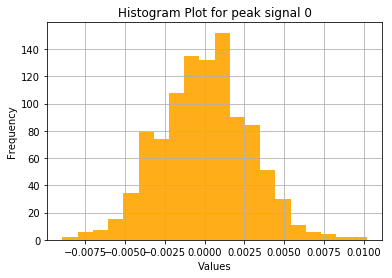

In [61]:
# historgram plot to show the distribution of values in the peek0 signal
peek_data['peek0'].hist(color='orange', alpha=0.9, bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Plot for peak signal 0')

Text(0.5,1,'Histogram Plot peek signal 1')

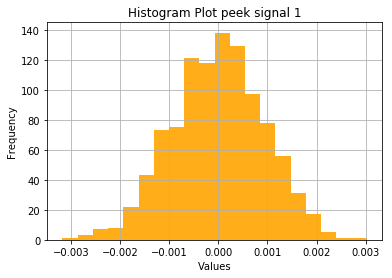

In [62]:

peek_data['peek1'].hist(color='orange', alpha=0.9, bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Plot peek signal 1')

In [63]:
# Line plot of the signals
# Hold the control key to select multiple peek point from the drop down menu
layout = go.Layout(
    title='<b>Interactive Multi Selection Time Series Plot</b>',
    yaxis=dict(
        title='<b>SIgnal Values</b>'
    ),
    xaxis=dict(
        title='<b>Time</b>'
    )
)


def update_plot(signals):
    
    """
    This function updates the plot everytime a widget is changed
    """

    data = []
    for s in signals:
        trace1 = go.Scatter(
            x=peek_data.index,
            y=peek_data[s],
            mode='lines',
            name=s,
            line=dict(
                shape='spline'
            )
        )
        data.append(trace1)

    fig = go.Figure(data=data, layout=layout)
    offline.iplot(fig)
    

signals = widgets.SelectMultiple(options=["peek"+ str(i) for i in range(0,587) ], description='Histogram plot')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description='Freq')
widgets.interactive(update_plot, signals=signals)

interactive(children=(SelectMultiple(description='Histogram plot', options=('peek0', 'peek1', 'peek2', 'peek3', 'peek4', 'peek5', 'peek6', 'peek7', 'peek8', 'peek9', 'peek10', 'peek11', 'peek12', 'peek13', 'peek14', 'peek15', 'peek16', 'peek17', 'peek18', 'peek19', 'peek20', 'peek21', 'peek22', 'peek23', 'peek24', 'peek25', 'peek26', 'peek27', 'peek28', 'peek29', 'peek30', 'peek31', 'peek32', 'peek33', 'peek34', 'peek35', 'peek36', 'peek37', 'peek38', 'peek39', 'peek40', 'peek41', 'peek42', 'peek43', 'peek44', 'peek45', 'peek46', 'peek47', 'peek48', 'peek49', 'peek50', 'peek51', 'peek52', 'peek53', 'peek54', 'peek55', 'peek56', 'peek57', 'peek58', 'peek59', 'peek60', 'peek61', 'peek62', 'peek63', 'peek64', 'peek65', 'peek66', 'peek67', 'peek68', 'peek69', 'peek70', 'peek71', 'peek72', 'peek73', 'peek74', 'peek75', 'peek76', 'peek77', 'peek78', 'peek79', 'peek80', 'peek81', 'peek82', 'peek83', 'peek84', 'peek85', 'peek86', 'peek87', 'peek88', 'peek89', 'peek90', 'peek91', 'peek92', 'peek93', 'peek94', 'peek95', 'peek96', 'peek97', 'peek98', 'peek99', 'peek100', 'peek101', 'peek102', 'peek103', 'peek104', 'peek105', 'peek106', 'peek107', 'peek108', 'peek109', 'peek110', 'peek111', 'peek112', 'peek113', 'peek114', 'peek115', 'peek116', 'peek117', 'peek118', 'peek119', 'peek120', 'peek121', 'peek122', 'peek123', 'peek124', 'peek125', 'peek126', 'peek127', 'peek128', 'peek129', 'peek130', 'peek131', 'peek132', 'peek133', 'peek134', 'peek135', 'peek136', 'peek137', 'peek138', 'peek139', 'peek140', 'peek141', 'peek142', 'peek143', 'peek144', 'peek145', 'peek146', 'peek147', 'peek148', 'peek149', 'peek150', 'peek151', 'peek152', 'peek153', 'peek154', 'peek155', 'peek156', 'peek157', 'peek158', 'peek159', 'peek160', 'peek161', 'peek162', 'peek163', 'peek164', 'peek165', 'peek166', 'peek167', 'peek168', 'peek169', 'peek170', 'peek171', 'peek172', 'peek173', 'peek174', 'peek175', 'peek176', 'peek177', 'peek178', 'peek179', 'peek180', 'peek181', 'peek182', 'peek183', 'peek184', 'peek185', 'peek186', 'peek187', 'peek188', 'peek189', 'peek190', 'peek191', 'peek192', 'peek193', 'peek194', 'peek195', 'peek196', 'peek197', 'peek198', 'peek199', 'peek200', 'peek201', 'peek202', 'peek203', 'peek204', 'peek205', 'peek206', 'peek207', 'peek208', 'peek209', 'peek210', 'peek211', 'peek212', 'peek213', 'peek214', 'peek215', 'peek216', 'peek217', 'peek218', 'peek219', 'peek220', 'peek221', 'peek222', 'peek223', 'peek224', 'peek225', 'peek226', 'peek227', 'peek228', 'peek229', 'peek230', 'peek231', 'peek232', 'peek233', 'peek234', 'peek235', 'peek236', 'peek237', 'peek238', 'peek239', 'peek240', 'peek241', 'peek242', 'peek243', 'peek244', 'peek245', 'peek246', 'peek247', 'peek248', 'peek249', 'peek250', 'peek251', 'peek252', 'peek253', 'peek254', 'peek255', 'peek256', 'peek257', 'peek258', 'peek259', 'peek260', 'peek261', 'peek262', 'peek263', 'peek264', 'peek265', 'peek266', 'peek267', 'peek268', 'peek269', 'peek270', 'peek271', 'peek272', 'peek273', 'peek274', 'peek275', 'peek276', 'peek277', 'peek278', 'peek279', 'peek280', 'peek281', 'peek282', 'peek283', 'peek284', 'peek285', 'peek286', 'peek287', 'peek288', 'peek289', 'peek290', 'peek291', 'peek292', 'peek293', 'peek294', 'peek295', 'peek296', 'peek297', 'peek298', 'peek299', 'peek300', 'peek301', 'peek302', 'peek303', 'peek304', 'peek305', 'peek306', 'peek307', 'peek308', 'peek309', 'peek310', 'peek311', 'peek312', 'peek313', 'peek314', 'peek315', 'peek316', 'peek317', 'peek318', 'peek319', 'peek320', 'peek321', 'peek322', 'peek323', 'peek324', 'peek325', 'peek326', 'peek327', 'peek328', 'peek329', 'peek330', 'peek331', 'peek332', 'peek333', 'peek334', 'peek335', 'peek336', 'peek337', 'peek338', 'peek339', 'peek340', 'peek341', 'peek342', 'peek343', 'peek344', 'peek345', 'peek346', 'peek347', 'peek348', 'peek349', 'peek350', 'peek351', 'peek352', 'peek353', 'peek354', 'peek355', 'peek356', 'peek357', 'peek358', 'peek359', 'peek360', 'peek361', 'peek362', 'peek363', 'peek364', 'peek365', 'peek366

##### This takes toolong to run
##### Skip this 
import pandas as pd
import numpy as np


corr = peek_data.corr()
corr.style.background_gradient(cmap='coolwarm')

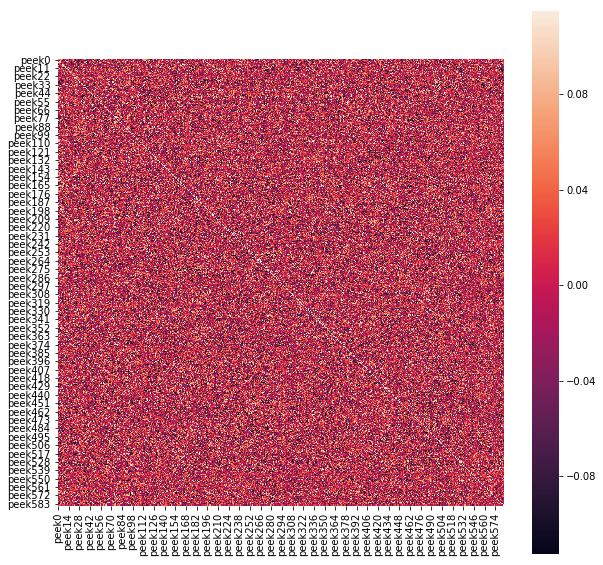

In [64]:
## correlation plot
from pylab import *

corr = peek_data.corr() # get correlation matrix
rcParams['figure.figsize'] = 10, 10 # set size of plot
sns.heatmap(corr, vmin=None, vmax=None, cmap=None, center=None, robust=True,
            annot=None, fmt='.3g', annot_kws=None, linewidths=0.5,
            linecolor=None, cbar=True, cbar_kws=None, cbar_ax=None, 
            square=True, xticklabels='auto', yticklabels='auto')  # plot using the seaborn library

### Data Preprocessing for Clustering

In [65]:
peek_data.isnull().sum().sum()

0

In [99]:
# convert data set  to list
# convert the peek data to a list 
# reshape each data set to 1024 by 1
data_list = [np.array(l).reshape(int(len(l)),1) for l in zip(*peek_data.values)]


#### Check Null in train set

In [100]:
# this should return nothing 
# otherwise there is null in the values
for i in data_list:
    if np.isnan(i).any():
        print(i)
        print('yes')
    else:
        pass

In [101]:
# save the list, data_list, as pickle file 
# pickle is a very portable file format
import pickle
with open('data_set.pickle', 'wb') as b: # open the data_set.pickle file
    pickle.dump(data_list,b) # dump the pickle data ste

In [102]:
# this is how to load pickle file  : that was saved above
with open('data_set.pickle', 'rb') as f: # open the pickle file  named data_set.pickle
    glist = pickle.load(f) # load the data in it

In [103]:
from secrets import randbelow # use this library to sample randomly for the data set lable.
                       

In [130]:
# This function is a modification of the function in the dtc folder
# it will be changed so that it could load over data set
# we load the pickle data set above
# and select random lablels
# the model at the end would assign the right label based on similarity
def prepare_dataset(K):
	n_clusters = K
	seq_list, label_list = [], []
	with open('data_set.pickle', 'rb') as f:  # open the file data_set.pickle
		seq_list = pickle.load(f) # load the list data_set
	label_list= [randbelow(n_clusters) for i in range(0,len(seq_list))]
	return seq_list, label_list

In [131]:
# test the function defined above 

data,labels = prepare_dataset(3) # data set and labels

#### Gramian Angular summation

In [132]:
# the aim of this part is toconvert time series to image
# this could be used in deep learning neural net for classification

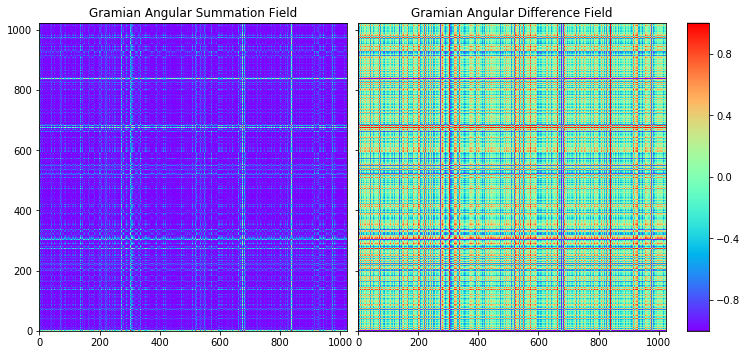

In [128]:
"""
=====================
Gramian Angular Field
=====================
This example shows how you can transform a time series into a Gramian Angular
Field using :class:`pyts.image.GramianAngularField`. Two methods are
available: Gramian Angular Summation Field and Gramian Angular Difference
Field.
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

# Parameters
n_samples, n_timestamps = 1, 1024

# Toy dataset

X = s[0].reshape(1,1024)

# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=1024, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=1024, method='difference')
X_gadf = gadf.fit_transform(X)

# Show the images for the first time series
fig = plt.figure(figsize=(12, 12))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Gramian Angular Summation Field',
          'Gramian Angular Difference Field']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title)
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()

In [126]:
X_gasf.shape

(1, 1024, 1024)

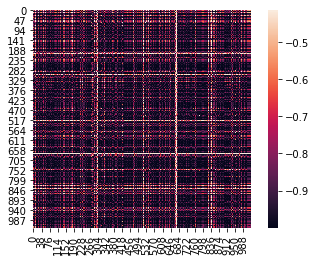

In [129]:
sns.heatmap(X_gasf[0], vmin=None, vmax=None, cmap=None, center=None, robust=True,
            annot=None, fmt='.3g', annot_kws=None, linewidths=0.5,
            linecolor=None, cbar=True, cbar_kws=None, cbar_ax=None, 
            square=True, xticklabels='auto', yticklabels='auto')  # plot using the seaborn library

In [ ]:
# TO DO
# Same gramian matrix of input
#with open('graham_set.pickle', 'wb') as b: # open the data_set.pickle file
#    pickle.dump(graham_list,b) # dump the pickle data ste